<b style="font-size:30px"> Respirometry experiment </b>

# Import modules

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load data

In [29]:
df = pd.read_excel('../data/Respirometric tests xls/Respirometry OUR heterotrophic growth blank.xlsx', 
                   sheet_name='Original data',
                   usecols='A,B,D,I',
#                  index_col=0,
                   skiprows=8)

In [30]:
df.head()

,Time,pH Probe,DO Probe,OUR
0,0.000000,7.953,6.09,NaN
1,0.097887,7.948,6.13,NaN
2,0.196953,7.949,6.10,NaN
3,0.294840,7.950,6.04,NaN
4,0.392727,7.951,6.02,NaN


In [8]:
df.columns

Index(['pH Probe', 'DO Probe', 'OUR'], dtype='object')

# adjust and refurbish your dataframe

In [31]:
df[' Time'] = df[' Time'] / 60 # to hours

In [43]:
df = df.set_index(' Time')

In [44]:
df.head()

,pH Probe,DO Probe,OUR
Time,,,
0.000000,7.953,6.09,NaN
0.001631,7.948,6.13,NaN
0.003283,7.949,6.10,NaN
0.004914,7.950,6.04,NaN
0.006545,7.951,6.02,NaN


In [41]:
df = df.reset_index()

In [42]:
df.head()

,Time,pH Probe,DO Probe,OUR
0,0.000000,7.953,6.09,NaN
1,0.001631,7.948,6.13,NaN
2,0.003283,7.949,6.10,NaN
3,0.004914,7.950,6.04,NaN
4,0.006545,7.951,6.02,NaN


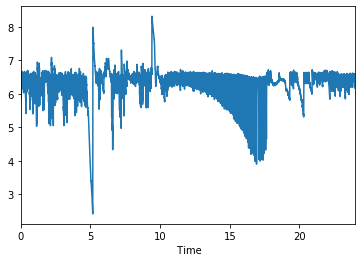

In [17]:
df['DO Probe'].plot()

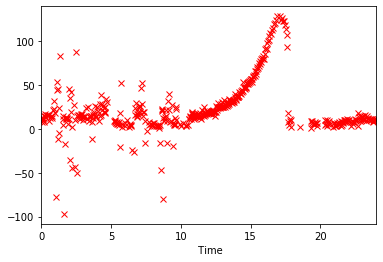

In [21]:
df['OUR'].plot(marker='x', color='r')

In [25]:
df['OUR'].describe()

count    477.000000
mean      23.166851
std       29.097432
min      -97.016645
25%        8.559742
50%       15.193307
75%       28.414871
max      128.258662
Name: OUR, dtype: float64

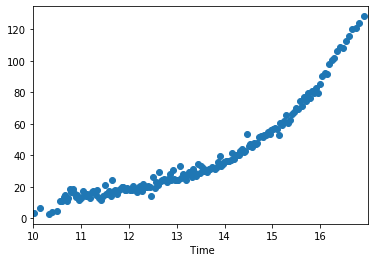

In [28]:
df['OUR'][10:17].plot(marker='o')

# calculate your parameters mumax and bh

## log OUR

In [35]:
logOUR = np.log10(df['OUR'][12:16].dropna())

In [37]:
logOUR

 Time
12.027853    1.245899
12.057337    1.246863
12.086821    1.308454
12.116305    1.261549
12.145789    1.251655
               ...   
15.823096    1.906664
15.867322    1.901573
15.911548    1.916466
15.955774    1.901892
16.000000    1.930733
Name: OUR, Length: 116, dtype: float64

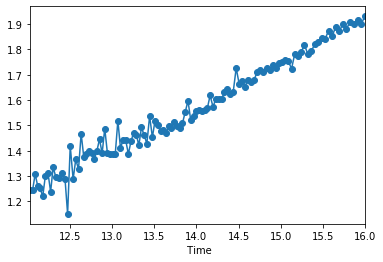

In [36]:
logOUR.plot(marker='o');

<div class="alert alert-success">
    <b> EXERCISE: </b> Do you remember how to use a rolling mean? Go! And plot it
</div>

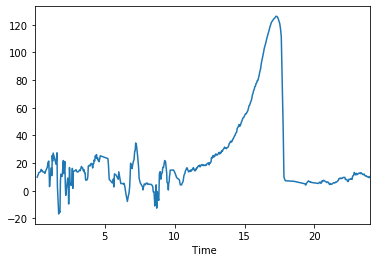

In [52]:
df['OUR'].dropna().rolling(5).mean().plot();

In [66]:
df['OUR'][12:13].fillna(method='ffill').rolling(3).mean()

 Time
12.000000          NaN
12.001631          NaN
12.003283          NaN
12.004914          NaN
12.006545          NaN
               ...    
12.992629    24.334149
12.994260    24.334149
12.995912    24.334149
12.997543    24.334149
12.999174    24.334149
Name: OUR, Length: 611, dtype: float64

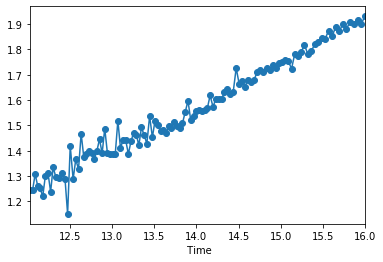

In [69]:
logOUR.plot(marker='o')

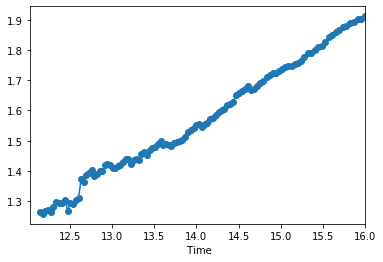

In [68]:
logOUR.dropna().rolling(5).mean().plot(marker='o')

In [70]:
m, q = np.polyfit(np.array(logOUR.dropna().index), logOUR.dropna().values, 1)

In [71]:
print(m, q)

0.16862521896681246 -0.7844477382797949


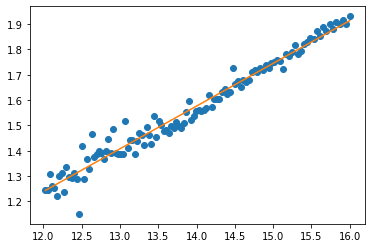

In [73]:
plt.plot(logOUR.dropna().index, logOUR.dropna().values, 'o')
plt.plot(logOUR.dropna().index, m*logOUR.dropna().index + q, '-');

In [81]:
logOUR_smoothed = logOUR.rolling(5).mean().dropna()

In [82]:
m, q = np.polyfit(np.array(logOUR_smoothed.index), logOUR_smoothed.values, 1)


$$ \mu_{max} - b_H $$

In [83]:
m * 24 # in d-1

4.022684811639298

In [85]:
mumax = m*24 - 0.62 # d-1
mumax

3.402684811639298

# with statsmodels

source https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

In [ ]:
import statsmodels.api as sm

X = np.array(logOUR.dropna().index)
y = np.array(logOUR.dropna().values)

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<div class="alert alert-success">
    <b> EXERCISE: </b> Complete the cell below and calculate the OUR yourself. Compare it with the one already present in the data
</div>

$$ OUR = k_La . (C_{sat} - C_t) - \frac{dC}{dt} $$

In [ ]:
kla = 4. # 1/h
Csat = 10. # mg/L

In [ ]:
df['newOUR'] = kla*(Csat - df['DO Probe']) - 